In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import math

f = 20.0      # frequency, Hz
A = 5.0       # half-amplitude, without unit; total amplitude will be from -A to +A
T = 1.0 / f   # period, s
periods = 4   # how many periods to show

samples = 10240                    # Number of samplepoints
spacing = T * periods / samples   # sample spacing; must be smaller than 1/(2 * max_freq)

# print(spacing, 1/f/2)

t = np.linspace(0.0, samples * spacing, samples, endpoint=False)   # Return evenly spaced numbers over a specified interval.

# t = np.arange(0.0, periods * T, T / resolution)     # Return evenly spaced values within a given interval.

sin = A * np.sin(2 * np.pi * t * f)
square = A * np.sign(sin)

fig1, signal = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
signal.plot(t, square)
signal.grid()

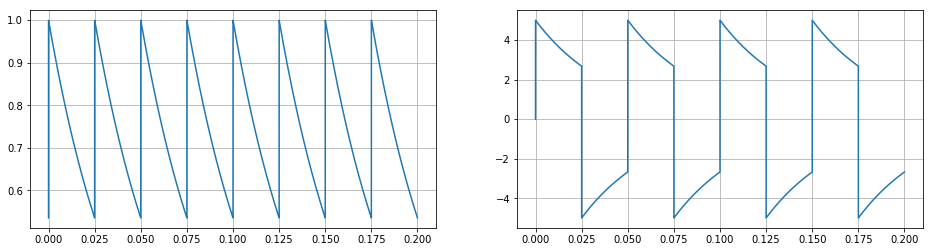

In [2]:
micro = 1 / 1000000.0
kilo = 1000.0

R = 2.0 * kilo
C = 20.0 * micro
tau = R*C

#print(T/resolution)

#discharge = np.exp(-(np.mod(t-(T/resolution), T/2)) / tau) #* np.sign(sin)
discharge = np.exp(-(np.mod(t-0.00000001, T/2)) / tau) #* np.sign(sin)

fig2, (disch, result) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
disch.plot(t, discharge)
result.plot(t, square * discharge)
disch.grid()
result.grid()

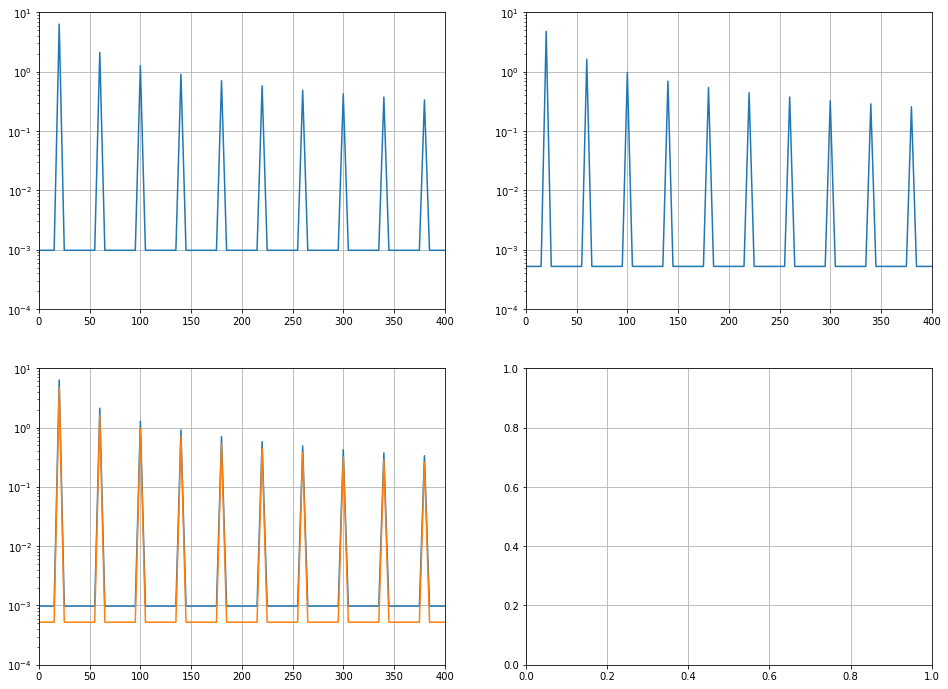

In [4]:
#print(len(square))
# N = len(square)
# yf = scipy.fftpack.fft(square * discharge, N)

fig3, ((fftsquare, fftresult), (fft21, fft22)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fftsquare.grid()
fftresult.grid()
fft21.grid()
fft22.grid()

xf = scipy.fft.fftfreq(samples, spacing)[:samples//2]

yfq = scipy.fft.fft(square)
fftsquare.semilogy(xf, 2.0/samples * np.abs(yfq[0:samples//2]))
fftsquare.set_xlim(left=0, right=400)
# print(fftsquare.get_ylim())
fftsquare.set_ylim(10e-5, 10)

yfd = scipy.fft.fft(square * discharge)
fftresult.semilogy(xf, 2.0/samples * np.abs(yfd[0:samples//2]))
fftresult.set_xlim(left=0, right=400)
# print(fftresult.get_ylim())
fftresult.set_ylim(10e-5, 10)

fft21.semilogy(xf, 2.0/samples * np.abs(yfq[0:samples//2]))
fft21.semilogy(xf, 2.0/samples * np.abs(yfd[0:samples//2]))
fft21.set_xlim(left=0, right=400)
fft21.set_ylim(10e-5, 10)
print()